In [1]:
from localmapper import localmapper
device = 'cuda:0' # requires gpu version of pytorch and dgl
mapper = localmapper(device)

Loaded LocalMapper (version=202403) at device cuda:0


In [2]:
examples = {
    'Thioether_synthesis': 'CC(C)S.CN(C)C=O.Fc1cccnc1F.O=C([O-])[O-].[K+].[K+]>>CC(C)Sc1ncccc1F',
    'Grignard_reaction': 'CCOCC.C[Mg+].O=Cc1ccc(F)cc1Cl.[Br-]>>CC(O)c1ccc(F)cc1Cl',
    'Morpholine_synthesis': 'BrCCOCCBr.CCN(C(C)C)C(C)C.CCOC(C)=O.CN(C)C=O.Cl.NCC(F)(F)CO>>OCC(F)(F)CN1CCOCC1',
    'Diels_Alder': 'C1=CCC=C1.O=C1C=CC(=O)C1>>O=C1CC(=O)C2C3C=CC(C3)C12',
    'Claisen_Rearrangement': 'OC1C=CC=CC=1C(C=C)(C)C>>C1=CC=C(OCC=C(C)C)C=C1',
       }

rxns = list(examples.values())

In [3]:
# single input
result = mapper.get_atom_map(rxns[0])
result

'[CH3:1][CH:2]([CH3:3])[SH:4].CN(C)C=O.[F:11][c:10]1[cH:9][cH:8][cH:7][n:6][c:5]1F.O=C([O-])[O-].[K+].[K+]>>[CH3:1][CH:2]([CH3:3])[S:4][c:5]1[n:6][cH:7][cH:8][cH:9][c:10]1[F:11]'

In [4]:
# multiple inputs
results = mapper.get_atom_map(rxns)
results

['[CH3:1][CH:2]([CH3:3])[SH:4].CN(C)C=O.[F:11][c:10]1[cH:9][cH:8][cH:7][n:6][c:5]1F.O=C([O-])[O-].[K+].[K+]>>[CH3:1][CH:2]([CH3:3])[S:4][c:5]1[n:6][cH:7][cH:8][cH:9][c:10]1[F:11]',
 'CCOCC.[CH3:1][Mg+].[O:3]=[CH:2][c:4]1[cH:5][cH:6][c:7]([F:8])[cH:9][c:10]1[Cl:11].[Br-]>>[CH3:1][CH:2]([OH:3])[c:4]1[cH:5][cH:6][c:7]([F:8])[cH:9][c:10]1[Cl:11]',
 'Br[CH2:8][CH2:9][O:10][CH2:11][CH2:12]Br.CCN(C(C)C)C(C)C.CCOC(C)=O.CN(C)C=O.Cl.[NH2:7][CH2:6][C:3]([F:4])([F:5])[CH2:2][OH:1]>>[OH:1][CH2:2][C:3]([F:4])([F:5])[CH2:6][N:7]1[CH2:8][CH2:9][O:10][CH2:11][CH2:12]1',
 '[CH:9]1=[CH:8][CH2:7][CH:10]=[CH:11]1.[O:1]=[C:2]1[CH:12]=[CH:6][C:4](=[O:5])[CH2:3]1>>[O:1]=[C:2]1[CH2:3][C:4](=[O:5])[CH:6]2[CH:7]3[CH:8]=[CH:9][CH:10]([CH2:11]3)[CH:12]12',
 '[OH:5][c:4]1[cH:3][cH:2][cH:1][cH:12][c:11]1[C:8]([CH:7]=[CH2:6])([CH3:9])[CH3:10]>>[cH:1]1[cH:2][cH:3][c:4]([O:5][CH2:6][CH:7]=[C:8]([CH3:9])[CH3:10])[cH:11][cH:12]1']

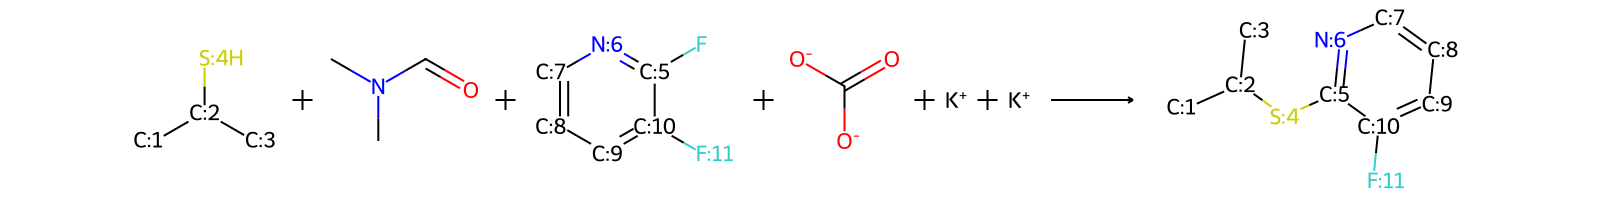

In [5]:
mapper.plot_rxn(results[0])

In [6]:
# return results as dictionary
results = mapper.get_atom_map(rxns, return_dict=True)
results

[{'rxn': 'CC(C)S.CN(C)C=O.Fc1cccnc1F.O=C([O-])[O-].[K+].[K+]>>CC(C)Sc1ncccc1F',
  'mapped_rxn': '[CH3:1][CH:2]([CH3:3])[SH:4].CN(C)C=O.[F:11][c:10]1[cH:9][cH:8][cH:7][n:6][c:5]1F.O=C([O-])[O-].[K+].[K+]>>[CH3:1][CH:2]([CH3:3])[S:4][c:5]1[n:6][cH:7][cH:8][cH:9][c:10]1[F:11]',
  'template': '[S:1].F-[c:2]>>[S:1]-[c:2]',
  'confident': True},
 {'rxn': 'CCOCC.C[Mg+].O=Cc1ccc(F)cc1Cl.[Br-]>>CC(O)c1ccc(F)cc1Cl',
  'mapped_rxn': 'CCOCC.[CH3:1][Mg+].[O:3]=[CH:2][c:4]1[cH:5][cH:6][c:7]([F:8])[cH:9][c:10]1[Cl:11].[Br-]>>[CH3:1][CH:2]([OH:3])[c:4]1[cH:5][cH:6][c:7]([F:8])[cH:9][c:10]1[Cl:11]',
  'template': '[C:1]-[Mg+].[C:2]=[O:3]>>[C:1]-[C:2]-[O:3]',
  'confident': True},
 {'rxn': 'BrCCOCCBr.CCN(C(C)C)C(C)C.CCOC(C)=O.CN(C)C=O.Cl.NCC(F)(F)CO>>OCC(F)(F)CN1CCOCC1',
  'mapped_rxn': 'Br[CH2:8][CH2:9][O:10][CH2:11][CH2:12]Br.CCN(C(C)C)C(C)C.CCOC(C)=O.CN(C)C=O.Cl.[NH2:7][CH2:6][C:3]([F:4])([F:5])[CH2:2][OH:1]>>[OH:1][CH2:2][C:3]([F:4])([F:5])[CH2:6][N:7]1[CH2:8][CH2:9][O:10][CH2:11][CH2:12]1',
  'temp